interactive(children=(FloatSlider(value=1.0, description='α (Prey growth)', max=2.0, min=0.1), FloatSlider(val…

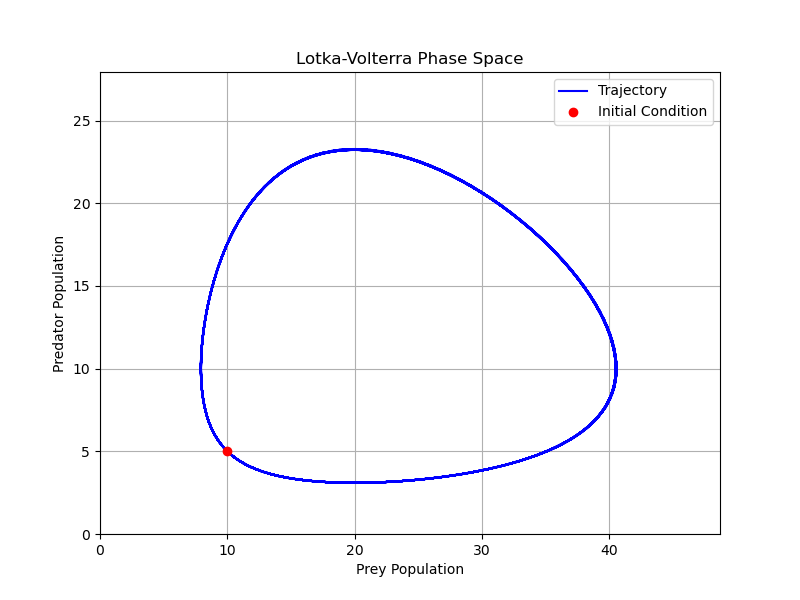

Print works


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact, FloatSlider
import matplotlib

# Set up matplotlib to use interactive mode
%matplotlib widget

# Define the Lotka-Volterra equations
def lotka_volterra(state, t, alpha, beta, gamma, delta):
    x, y = state
    dxdt = alpha * x - beta * x * y
    dydt = -gamma * y + delta * x * y
    return [dxdt, dydt]

# Function to solve and plot the trajectory
def plot_trajectory(alpha=1.0, beta=0.1, gamma=1.5, delta=0.075):
    global initial_conditions
    t = np.linspace(0, 100, 1000)  # Time array
    
    # Solve the differential equations
    solution = odeint(lotka_volterra, initial_conditions, t, args=(alpha, beta, gamma, delta))
    prey = solution[:, 0]
    predators = solution[:, 1]
    
    # Clear the current figure
    fig.clf()
    print(fig)
    ax = fig.add_subplot(111)
    
    # Plot the trajectory in phase space (prey vs predators)
    ax.plot(prey, predators, 'b-', label='Trajectory')
    ax.plot(initial_conditions[0], initial_conditions[1], 'ro', label='Initial Condition')
    ax.set_xlabel('Prey Population')
    ax.set_ylabel('Predator Population')
    ax.set_title('Lotka-Volterra Phase Space')
    ax.grid(True)
    ax.legend()
    ax.set_xlim(0, max(prey.max(), initial_conditions[0]) * 1.2)
    ax.set_ylim(0, max(predators.max(), initial_conditions[1]) * 1.2)
    
    # Update the plot
    plt.draw()

# Function to handle mouse clicks
def onclick(event):
    global initial_conditions
    print(event)
    if event.inaxes == ax:
        initial_conditions = [event.xdata, event.ydata]
        update_plot()

# Function to update the plot with current slider values
def update_plot():
    plot_trajectory(
        alpha=alpha_slider.value,
        beta=beta_slider.value,
        gamma=gamma_slider.value,
        delta=delta_slider.value
    )

# Initial conditions (default starting point)
initial_conditions = [10.0, 5.0]

# Create the figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Connect the click event
cid = fig.canvas.mpl_connect('button_press_event', onclick)

# Define sliders
alpha_slider = FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='α (Prey growth)')
beta_slider = FloatSlider(min=0.01, max=0.5, step=0.01, value=0.1, description='β (Predation rate)')
gamma_slider = FloatSlider(min=0.1, max=2.0, step=0.1, value=1.5, description='γ (Predator death)')
delta_slider = FloatSlider(min=0.01, max=0.2, step=0.01, value=0.075, description='δ (Predator growth)')

# Create the interactive widget
interact(
    plot_trajectory,
    alpha=alpha_slider,
    beta=beta_slider,
    gamma=gamma_slider,
    delta=delta_slider
)

# Display the plot
plt.show()
print("Print works")